In [1]:
import pyramses
# import cmath
# import math
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
import pandas as pd
import datetime

# Functions

In [2]:
def get_measurements_central(f, rocof, old_level, nadir_reached, Tsample, hyst):
    w = ram.getObs('SYN', 'G', 'Omega')
    f.append(w[0]*50)
    new_nadir = False

    lim32 = 48.5
    lim21 = 49.5
    lim10 = 49.9
    lim01 = 50.1
    lim12 = 50.5
    lim23 = 51.5
    if not hyst:
        if f[-1] <= lim32:
            f_level = -3
        elif f[-1] <= lim21:
            f_level = -2
        elif f[-1] <= lim10:
            f_level = -1
        elif f[-1] < lim01:
            f_level = 0
        elif f[-1] < lim12:
            f_level = 1
        elif f[-1] < lim23:
            f_level = 2
        else: f_level = 3
    
    else:
        f_1 = f[-1]
        db = 0.05

        if old_level == -3:
            if f_1 <= lim32 + db:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -2:
            if f_1 <= lim32 - db:
                f_level = -3
            if f_1 <= lim21 + db:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -1:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21 - db:
                f_level = -2
            elif f_1 <= lim10 + db:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 0:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10 - db:
                f_level = -1
            elif f_1 < lim01 + db:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 1:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01 - db:
                f_level = 0
            elif f_1 < lim12 + db:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3


        if old_level == 2:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12 - db:
                f_level = 1
            elif f_1 < lim23 + db:
                f_level = 2
            else:
                f_level = 3

        if old_level == 3:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23 - db:
                f_level = 2
            else:
                f_level = 3
    
    roc01 = 0.45
    roc12 = 2.3
    roc23 = 6.5    
    rocof.append((f[-1] - f[-2]) / Tsample)
    if rocof[-1] <= -roc23:
        r_level = -3
    elif rocof[-1] <= -roc12:
        r_level = -2
    elif rocof[-1] <= -roc01:
        r_level = -1
    elif rocof[-1] < roc01:
        r_level = 0
    elif rocof[-1] < roc12:
        r_level = 1
    elif rocof[-1] < roc23:
        r_level = 2
    else: r_level = 3
    
    worst_level = f_level if abs(f_level)>=abs(r_level) else r_level
    if rocof[-1] * rocof[-2] < -0.0000001 or nadir_reached[-1] == True:
        new_nadir = True   
    
    if new_nadir == True:
        lvl = f_level
    else: 
        lvl = worst_level if abs(worst_level)>=abs(old_level) else old_level
    

    return lvl, new_nadir

def get_limits_atl(ATL): # having two functions we could use them at different frequencies.
    lim_v_min = ram.getObs('INJ', ATL, 'F_v_min_out')
    lim_v_max = ram.getObs('INJ', ATL, 'F_v_max_out')
    lim_p_min = ram.getObs('INJ', ATL, 'F_p_min')
    lim_p_max = ram.getObs('INJ', ATL, 'F_p_max')
    
    return int(lim_v_min[0]), int(lim_v_max[0]), int(lim_p_min[0]), int(lim_p_max[0])

def update_emergency_level(t, ATL, level_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' lvl ' + str(level_diff) + ' 0')

# def update_nadir(t, ATL, nadir_diff):
#     ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' nadir ' + str(2*nadir_diff) + ' 0')
def update_neighbourhood_Phelp(t, ATL, p_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0')
def update_neighbourhood_Vhelp(t, ATL, v_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' V_n ' + str(v_diff) + ' 0')
def update_neighbourhood_help(t, ATL, v_diff, p_diff):
    if p_diff != 0:
        ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0')
    if v_diff != 0:
        ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' V_n ' + str(v_diff) + ' 0')

# Initial set points

In [3]:
today = datetime.date.today() 
out_dir = ".\\" +  str(today) + "\\"

event_time = 2
event_time2 = 2.5

file = 'Extended model.xlsx'
xl = pd.ExcelFile(file)
MV_buses_load = xl.parse('MV ATL') ['busname']
LV_buses_load = xl.parse('LV ATL') ['busname']
LV_buses_PV = xl.parse('LV PV') ['busname']
ATLlist = []
# LV_load_bus = ['01']
# LVloadlist = ['TL117501', 'TL117511', 'TL117515', 'TL117516', 'TL117517', 'TL117518'] 

# listofsyncs = ram.getAllCompNames("SYNC")
# Islanding
# ram.addDisturb(5.000, 'FAULT BUS 1000 0 0')
# ram.addDisturb(2, 'BREAKER BRANCH 117510-117518 1 0')
# ram.addDisturb(2, 'BREAKER BRANCH 1157-1158 1 0')
# Short circuit
# ram.addDisturb(5.000, 'VFAULT BUS 1105 0.95')
# ram.addDisturb(2.5, 'FAULT BUS 1101 0 0.1')
# ram.addDisturb(4.5, 'CLEAR BUS 1101')
# Frequency event
# ram.addDisturb(2, 'CHGPRM INJ L0 P0 -1.5 0.1')
# ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.1 0.1')
# Test short circuit currents
# ram.addDisturb(0.5, 'FAULT BUS 117510 0 0.1')
# ram.addDisturb(2.5, 'CLEAR BUS 117510')  # units should disconnect, PVs reconnect after some time
# ram.addDisturb(1, 'CLEAR BUS 117510')    # if protection on, units should stay connected

Thorizon = 8
Tsample = 0.05


LVloadlist = ['TL117501', 'TL117511', 'TL117515', 'TL117516', 'TL117517', 'TL117518'] 
# IBGS = ['PV11','PV15', 'PV16','PV17', 'PV18'] 
level = [0]
count_v = []
count_p = []
v_diff = []
p_diff = []
for i in range(len(MV_buses_load)):
    count_v.append([0])
for i in range(len(MV_buses_load)):
    count_p.append([0])    
for i in range(len(MV_buses_load)):
    v_diff.append([0])
for i in range(len(MV_buses_load)):
    p_diff.append([0])

f = [50]
rocof = [0]
nadir_reached = [False]
hyst = True

control = 'active'
# control = 'inactive'
# control = 'droop'
if control == 'active' or control == 'inactive':
    curr_ATL_vers = 'v9'
else:
    curr_ATL_vers = 'dr'

strength = 'strong'
# strength = 'weak'


cmd = 'cmd_' + curr_ATL_vers + '_' + strength
out = strength

# Simulation

In [4]:
ram = pyramses.sim(r"C:\Users\Carlo\OneDrive - ETH Zurich\MA Carlo\URAMSES-3.40c\Release_intel_w64")
case = pyramses.cfg(cmd + ".txt")
case.addTrj(out_dir + out + '_' + control + ".trj")
case.addOut(out_dir + "output.trace")
ram.execSim(case,0)

for t in np.arange(Tsample,Thorizon,Tsample):

    # Simulates until the next sampling point. If there is an error, then exit the loop printing the error.
    try:
        ram.contSim(t)
    except:
        print(ram.getLastErr())
        break
    if (event_time < t+Tsample) and (event_time >= t):
        ram.addDisturb(event_time, 'CHGPRM INJ L0 P0 -1.5 0.1')
    #     ram.addDisturb(event_time, 'FAULT BUS 117501 0 0.1')
    # if (event_time2 < t+Tsample) and (event_time >= t):
    #     ram.addDisturb(event_time2, 'CLEAR BUS 117501')  # units should disconnect, PVs reconnect after some time
    last_level, new_nadir = get_measurements_central(f, rocof, level[-1], nadir_reached, Tsample, hyst)
    level.append(last_level)
    level_diff = level[-1] - level[-2]
    nadir_reached.append(new_nadir)

    if control == 'active':    
        for i, MV_bus in enumerate(MV_buses_load):
            count_v_instant = 0
            count_p_instant = 0
            for LV_bus_load in LV_buses_load: # measure loop. LV_buses_load must be all the laads for the given LV system, so they have to have the correct name       
                ATL = ('ATL'+ str(MV_bus) + str(LV_bus_load).zfill(2))
                lim_v_min, lim_v_max, lim_p_min, lim_p_max = get_limits_atl(ATL)
                count_v_instant += lim_v_max - lim_v_min
                count_p_instant += lim_p_max - lim_p_min

            count_v[i].append(count_v_instant)
            count_p[i].append(count_p_instant)

            v_diff[i].append(count_v[i][-1] - count_v[i][-2])
            p_diff[i].append(count_p[i][-1] - count_p[i][-2])
        

            for LV_bus_load in LV_buses_load: # update loop. separate because this way the count goes through all the LV before updating
                ATL = ('ATL'+ str(MV_bus) + str(LV_bus_load).zfill(2))
                if level_diff != 0:
                    update_emergency_level(t+0.001, ATL, level_diff)
                if p_diff[i][-1] != 0:
                    update_neighbourhood_Phelp(t+0.001, ATL, p_diff[i][-1])
                if v_diff[i][-1] != 0:
                    update_neighbourhood_Vhelp(t+0.001, ATL, v_diff[i][-1])
            for LV_bus_PV in LV_buses_PV:
                IBG = ('PV' + str(MV_bus) + str(LV_bus_PV).zfill(2))
            #     # if p_diff[i][-1] != 0:
            #         # update_neighbourhood_Phelp(t+0.0001, IBG, -p_diff[i][-1])
                # if v_diff[i][-1] != 0:
                #     update_neighbourhood_Vhelp(t+0.001, IBG, v_diff[i][-1])
                # if level_diff != 0:
                #     update_emergency_level(t+0.001, IBG, -level_diff)
                    # ram.addDisturb(t+0.001, 'CHGPRM INJ ' + IBG + ' V_n ' + str(v_diff[i][-1]) + ' 0')
ram.endSim()

0

# Level

In [5]:
plt.style.use("ggplot")
fr = f

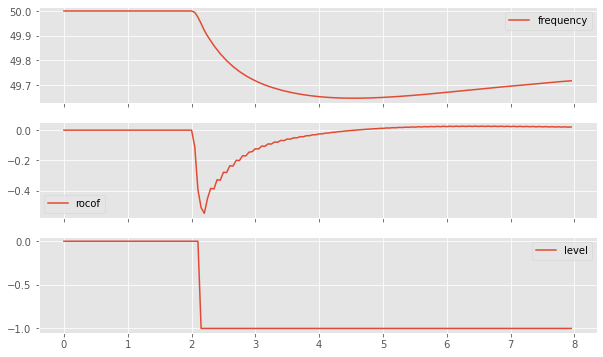

In [6]:
fig = plt.figure(None, (10,6))
(ax0, ax1,ax2) = fig.subplots(3,1, sharex = True)
ax0.plot(np.arange(0,Thorizon,Tsample), fr, label = 'frequency')
ax0.legend()
ax1.plot(np.arange(0,Thorizon,Tsample), rocof, label = 'rocof')
ax1.legend()
len1 = len(p_diff[0])
ax2.plot(np.arange(0,Thorizon,Tsample), level, label = 'level')
ax2.legend()

In [7]:
print(fr[5])
print(rocof[5])

50.00000000000006
0.0


# Disturbance

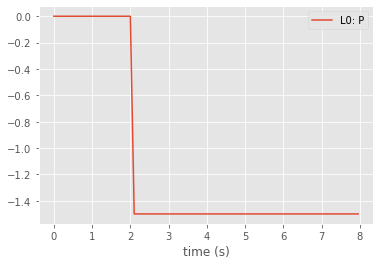

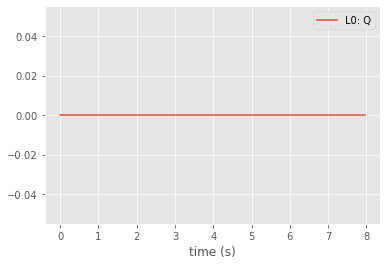

In [8]:
# ext = pyramses.extractor(out_dir + "weak" + '_' + "PVnb2" + ".trj")
ext = pyramses.extractor(case.getTrj())
# open Monte Carlo results 1
# ext = pyramses.extractor('out1.trj')
plt.style.use("ggplot")

# disturbance
ext.getInj('L0').P.plot()
ext.getInj('L0').Q.plot()

# TN

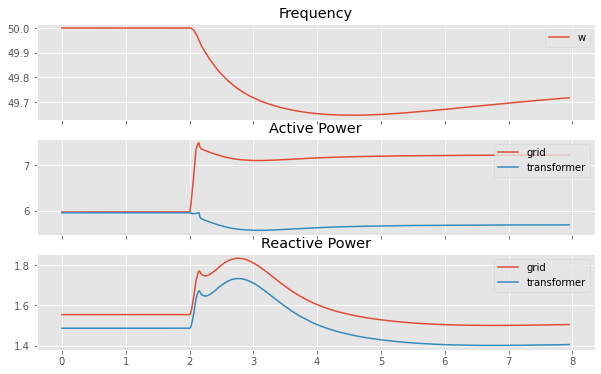

In [9]:
# TN node overview
fig = plt.figure(None, (10,6))
ax1, ax2, ax3 = fig.subplots(3,1, sharex = True)

w_coi = ext.getSync('G').SC
w = ext.getSync('G').S
pg = ext.getSync('G').P
qg = ext.getSync('G').Q

pt = ext.getBranch('TxMAIN').PF
qt = ext.getBranch('TxMAIN').QF

# ax1.plot(w_coi.time, w_coi.value*50+50, label='w_coi')
ax1.plot(w.time, w.value*50, label='w')
ax2.plot(pg.time, pg.value, label='grid')
ax2.plot(pt.time, pt.value, label='transformer')
ax3.plot(qg.time, qg.value, label='grid')
ax3.plot(qt.time, qt.value, label='transformer')

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax1.set_title('Frequency')
ax2.set_title('Active Power')
ax3.set_title('Reactive Power')

plt.savefig(out_dir+'TN.pdf')  

# Define the lists

In [10]:
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))

# Loads

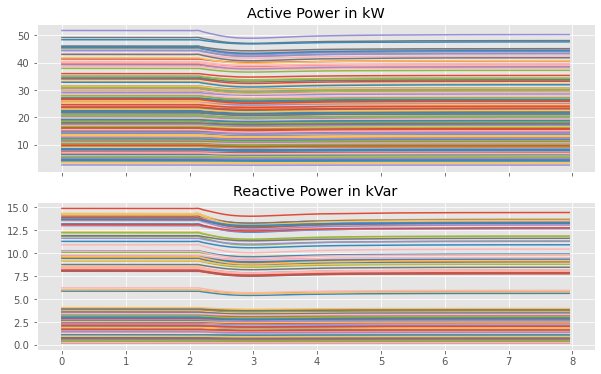

In [11]:
# loads = ["L11"+str(i) for i in range(1,74+1) + "11"]
# loads = ['IMP0', 'IMP1', 'IMP2', 'IMP3', 'IMP4', 'IMP5']

fig = plt.figure(None, (10,6))
ax1, ax2 = fig.subplots(2,1, sharex = True)

for load in loads:
    p = ext.getInj(load).P
    q = ext.getInj(load).Q
    ax1.plot(p.time, p.value*1000, label=load)
    ax2.plot(q.time, q.value*1000, label=load)

    
#     ax1.legend(loc="upper right")
#     ax2.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.set_title('Reactive Power in kVar')
    
plt.savefig(out_dir+'Loads.pdf')  

# Voltages

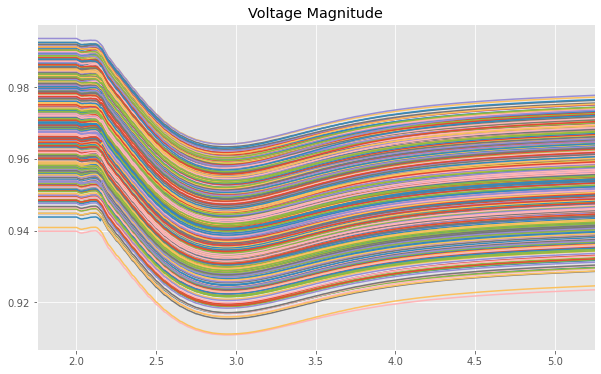

In [12]:
# buses = [str(i) for i in range(1101,1175+1)]
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1, sharex = True)

for bus in buses:
    v = ext.getBus(bus).mag
    ax1.plot(v.time, v.value, label=bus)
#     ax1.legend(loc="upper right")
    ax1.set_title('Voltage Magnitude')
ax1.set_xlim([1.75,5.25])

plt.savefig(out_dir+'Vn.pdf')  
    

# PVs 

<Figure size 720x432 with 0 Axes>

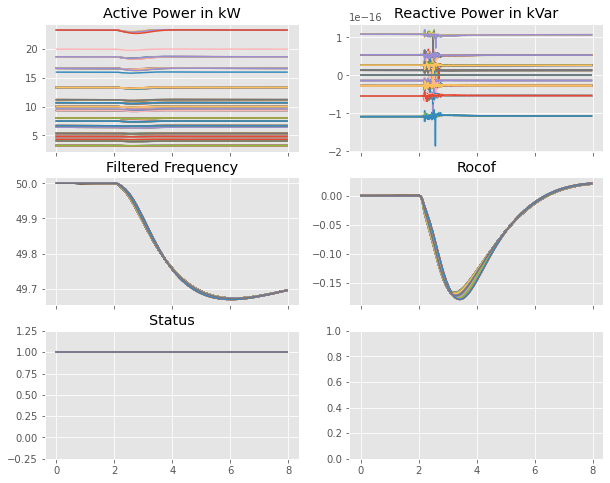

In [13]:
# vscs = ["PV"+str(i) for i in range(1,74+1)]
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,8), sharex=True)

for vsc in PVs: 
    p = ext.getInj(vsc).Pgen 
    q = ext.getInj(vsc).Qgen 
    w = ext.getInj(vsc).fmfilt
    df = ext.getInj(vsc).rocof
    status = ext.getInj(vsc).status
    #Fvl = ext.getInj(vsc).Fvl

    ax1.plot(p.time, p.value*1000, label=vsc)
#     ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=vsc)
#     ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kVar')
    ax3.plot(w.time, w.value, label=vsc)
#     ax3.legend(loc="upper right")
    ax3.set_title('Filtered Frequency')
    ax4.plot(df.time, df.value, label=vsc)
#     ax4.legend(loc="upper right")
    ax4.set_title('Rocof')
    ax5.plot(status.time, status.value, label=vsc)
#     ax4.legend(loc="upper right")
    ax5.set_title('Status')
    ax5.set_ylim([-0.25,1.25])

plt.savefig(out_dir+'PV.pdf')  

# Induction machines

<Figure size 720x432 with 0 Axes>

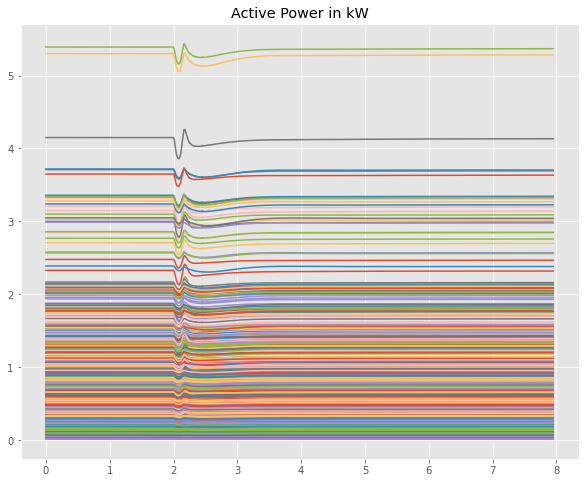

In [14]:
# ims = ["SM"+str(i) for i in range(1,74+1)]
fig = plt.figure(None, (10,6)) 
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8), sharex=True)

for im in IMs: 
    p = ext.getInj(im).P 

    ax1.plot(p.time, p.value*1000, label=im)
#     ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    
plt.savefig(out_dir+'IM.pdf')  

# ATLs

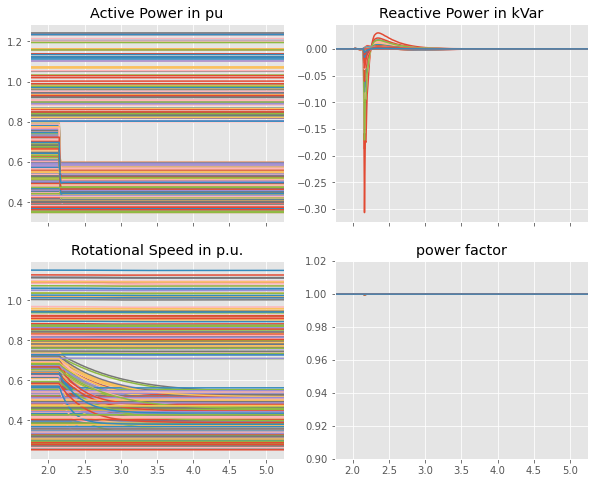

In [15]:
# tls = ["TL"+str(i) for i in range(1,74)]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,8), sharex=True)

for unit in TLs: 
    p = ext.getInj(unit).P
    q = ext.getInj(unit).Q
    wm = ext.getInj(unit).wm
    punit = ext.getInj(unit).Punit
    qunit = ext.getInj(unit).Qunit

    vd = ext.getInj(unit).vd
    vq = ext.getInj(unit).vq
    status = ext.getInj(unit).status
 
    pf = abs(p.value)/np.sqrt(q.value*q.value+p.value*p.value)
    ax1.plot(p.time, punit.value, label=unit)
#     ax1.legend(loc="upper right")
    ax1.set_title('Active Power in pu')
    ax2.plot(q.time, q.value*1000, label=unit)
#     ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kVar')
    ax3.plot(wm.time, wm.value, label=unit)
#     ax3.legend(loc="upper right")
    ax3.set_title('Rotational Speed in p.u.')
    ax4.plot(punit.time, pf, label=unit)
# #     ax4.legend(loc="upper right")
    ax4.set_title('power factor')
    ax1.set_xlim([1.75,5.25])
    ax4.set_ylim([0.9,1.02])
    # ax1.set_ylim([0.3,1.2])

plt.savefig(out_dir+'ATLs.pdf')      

# ATLs neighbourhood control 

<Figure size 1440x576 with 0 Axes>

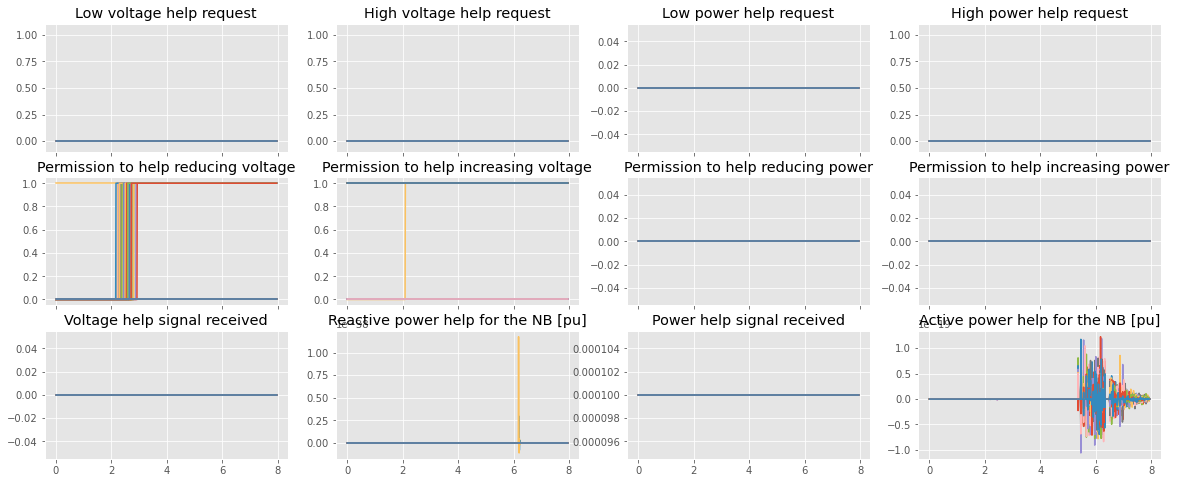

In [16]:
atls = ['TL110101', 'TL110111', 'TL110115', 'TL110116', 'TL110117', 'TL110118'] 
# atls = ['TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL1']
# atls = ['TL1']
fig = plt.figure(None, (20,8)) 
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4,figsize=(20,8), sharex=True)

for tl in TLs: 
    F_v_min = ext.getInj(tl).F_v_min_ou
    F_v_max = ext.getInj(tl).F_v_max_ou
    F_p_min = ext.getInj(tl).F_p_min
    F_p_max = ext.getInj(tl).F_p_max
    F_hlp_high = ext.getInj(tl).F_hlp_high
    F_hlp_low = ext.getInj(tl).F_hlp_low
    F_hlp_p_p2 = ext.getInj(tl).F_hlp_p_p2
    F_hlp_p_m2 = ext.getInj(tl).F_hlp_p_m2 
    dPnb = ext.getInj(tl).dPnb
    dQnb = ext.getInj(tl).dQnb
    P_n = ext.getInj(tl).P_n_var
    V_n = ext.getInj(tl).V_n_var
    # F_p_c_min = ext.getInj(tl).F_p_c_min
    # dPc_no_bound = ext.getInj(tl).dPc_no_bou
    ax1.plot(F_v_min.time, F_v_min.value, label=tl)
    # ax1.legend(loc="upper right")
    ax1.set_title('Low voltage help request')
    ax1.set_ylim([-0.1,1.1])
    ax2.plot(F_v_max.time, F_v_max.value, label=tl)
    # ax2.legend(loc="upper right")
    ax2.set_title('High voltage help request')
    ax2.set_ylim([-0.1,1.1])
    
    ax3.plot(F_p_min.time, F_p_min.value, label=tl)
    # ax3.legend(loc="upper right")
    ax3.set_title('Low power help request')
    # ax4.plot(np.arange(0,Thorizon,Tsample), count_p, label=tl)
    # ax4.legend(loc="upper right")
    # ax4.set_title('count_p')
    ax4.plot(F_p_max.time, F_p_max.value, label=tl)
    # ax4.legend(loc="upper right")
    ax4.set_title('High power help request')
    ax4.set_ylim([-0.1,1.1])
    
    ax5.plot(F_hlp_low.time, F_hlp_low.value, label=tl)
    # ax5.legend(loc="upper right")
    ax5.set_title('Permission to help reducing voltage')
    ax6.plot(F_hlp_high.time, F_hlp_high.value, label=tl)
    # ax6.legend(loc="upper right")
    ax6.set_title('Permission to help increasing voltage')
    
    
    
    ax7.plot(F_hlp_p_m2.time, F_hlp_p_m2.value, label=tl)
    # ax7.legend(loc="upper right")
    ax7.set_title('Permission to help reducing power')
    ax8.plot(F_hlp_p_p2.time, F_hlp_p_p2.value, label=tl)
    # ax8.legend(loc="upper right")
    ax8.set_title('Permission to help increasing power')

    ax9.plot(V_n.time, V_n.value, label=tl)
    # ax9.legend(loc="upper right")
    ax9.set_title('Voltage help signal received')
    ax10.plot(dQnb.time, dQnb.value, label=tl)
    # ax10.legend(loc="upper right")
    ax10.set_title('Reactive power help for the NB [pu]')
    # ax10.set_ylim([-0.1,1.1])
    
    ax11.plot(P_n.time, P_n.value, label=tl)
    # ax11.legend(loc="upper right")
    ax11.set_title('Power help signal received')
    
    ax12.plot(dPnb.time, dPnb.value, label=tl)
    # ax12.legend(loc="upper left")
    ax12.set_title('Active power help for the NB [pu]')
    # ax12.set_ylim([-0.1,1.1])
    # ax1.set_xlim([1.75,7.25])

    # ax5.set_xlim([5.98,6.02])
    # ax1.set_xlim([4.75,5.25])

plt.savefig(out_dir+'ATLneighbourhood.pdf')  

# Single ATL

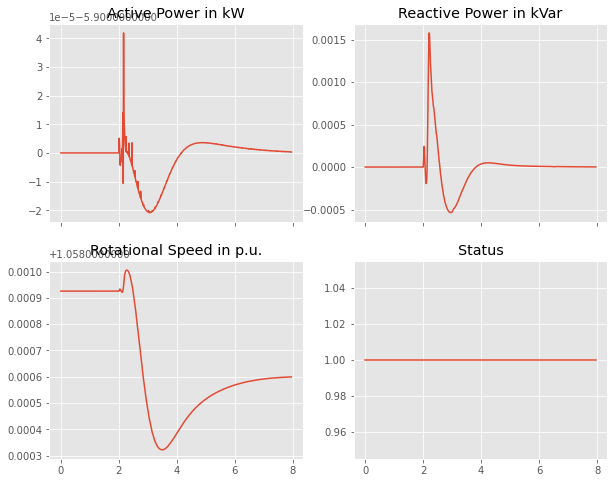

In [17]:
tls = ["ATL114415"]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,8), sharex=True)

for unit in tls: 
    p = ext.getInj(unit).P
    q = ext.getInj(unit).Q
    wm = ext.getInj(unit).wm
    f = ext.getInj(unit).status
    #Fvl = ext.getInj(vsc).Fvl

    ax1.plot(p.time, p.value*1000, label=unit)
#     ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=unit)
#     ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kVar')
    ax3.plot(wm.time, wm.value, label=unit)
#     ax3.legend(loc="upper right")
    ax3.set_title('Rotational Speed in p.u.')
    ax4.plot(f.time, f.value, label=unit)
#     ax4.legend(loc="upper right")
    ax4.set_title('Status')
    

# Loads neighbourhood

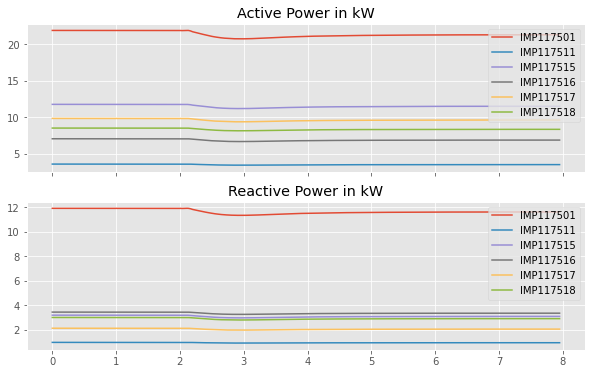

In [18]:
loads = ['IMP117501','IMP117511', 'IMP117515', 'IMP117516', 'IMP117517', 'IMP117518']
fig = plt.figure(None, (10,6))
ax1, ax2 = fig.subplots(2,1, sharex = True)

for load in loads:
    p = ext.getInj(load).P
    q = ext.getInj(load).Q
    ax1.plot(p.time, p.value*1000, label=load)
    ax2.plot(q.time, q.value*1000, label=load)

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax1.set_title('Active Power in kW')
ax2.set_title('Reactive Power in kW')
    
plt.savefig(out_dir+'Loads neighbourhood.pdf')

# Voltages neighbourhood

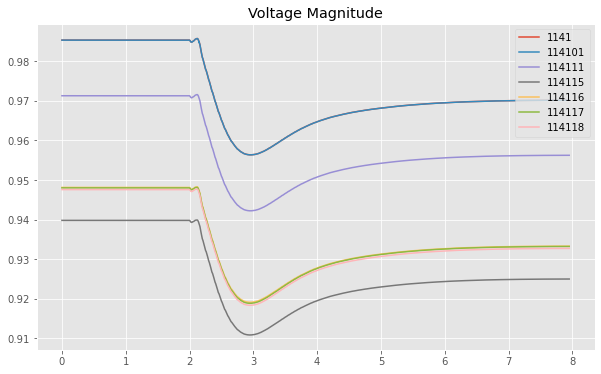

<Figure size 720x432 with 0 Axes>

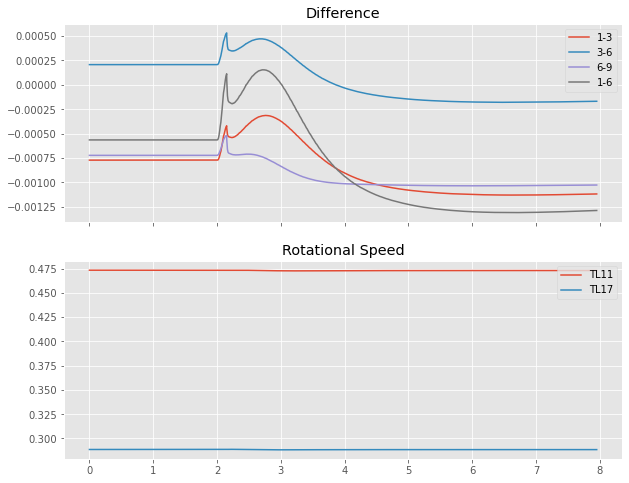

In [19]:
buses = ['1141','114101', '114111','114115' ,'114116', '114117', '114118']
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1, sharex = True)

for bus in buses:
    v = ext.getBus(bus).mag
    ax1.plot(v.time, v.value, label=bus)
    ax1.legend(loc="upper right")
    ax1.set_title('Voltage Magnitude')

plt.savefig(out_dir+'Vn neighbourhood.pdf')  
# with :ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.08 0.1')
# the load 11 is the only one that is at minimum speed, all the others are not. How does this affect the voltage in the various posiions and their difference?
v1 = ext.getBus('117501').mag
v11 = ext.getBus('117503').mag
v16 = ext.getBus('117506').mag
v17 = ext.getBus('117509').mag
wm11 = ext.getInj('ATL117511').wm
wm17 = ext.getInj('ATL117517').wm
d1 = (v1.value - v11.value)/v11.value
d2 = (v11.value - v16.value)/v11.value
d3 = (v16.value - v17.value)/v16.value
d4 = (v1.value - v16.value)/v1.value
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(10,8), sharex=True)
ax1.plot(v1.time, d1, label='1-3')
ax1.plot(v1.time, d2, label='3-6')
ax1.plot(v1.time, d3, label='6-9')
ax1.plot(v1.time, d4, label='1-6')
ax1.legend()
ax1.set_title('Difference')
ax2.plot(wm11.time, wm11.value, label='TL11')
ax2.plot(wm17.time, wm17.value, label='TL17')
ax2.legend(loc="upper right")
ax2.set_title('Rotational Speed');

# ATLs neighbourhood

<Figure size 720x432 with 0 Axes>

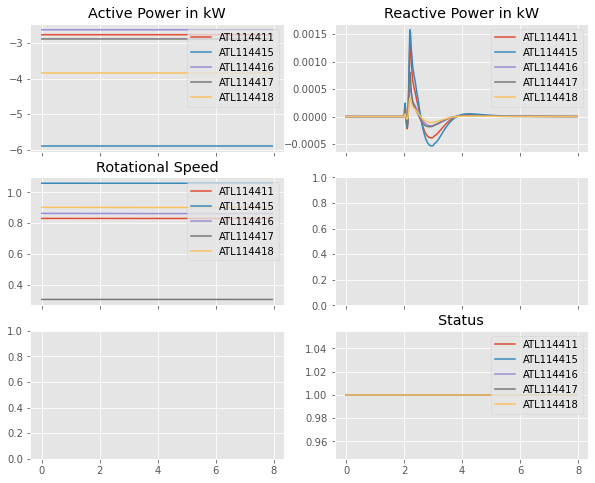

In [20]:
atls = ['ATL114411', 'ATL114415', 'ATL114416', 'ATL114417', 'ATL114418'] 
# atls = ['TL11']
# atls = ['TL1']
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,8), sharex=True)

for tl in atls: 
    p = ext.getInj(tl).P
    punit = ext.getInj(tl).Punit
    pref =  ext.getInj(tl).Pref
    q = ext.getInj(tl).Q
    wm = ext.getInj(tl).wm
    # f = ext.getInj(tl).f
    # df = ext.getInj(tl).rocof 
    status = ext.getInj(tl).status
    wm_ref = ext.getInj(tl).wm_ref_lim

    ax1.plot(p.time, p.value*1000, label=tl)
#     ax1.plot(punit.time, punit.value, label=tl)
#     ax1.plot(pref.time, pref.value, label=tl)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=tl)
    ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kW')
    ax3.plot(wm.time, wm.value, label=tl)
#     ax3.plot(wm_ref.time, wm_ref.value, label=tl)
    ax3.legend(loc="upper right")
    ax3.set_title('Rotational Speed')
    # ax4.plot(df.time, df.value, label=tl)
    # ax4.legend(loc="upper right")
    # ax4.set_title('rocof')
    # ax5.plot(f.time, f.value, label=tl)
    # ax5.legend(loc="upper right")
    # ax5.set_title('Frequency in Hz')
    ax6.plot(status.time, status.value, label=tl)
    ax6.legend(loc="upper right")
    ax6.set_title('Status')
    
plt.savefig(out_dir+'ATL neighbourhood.pdf')  

# PVs neighbourhood

<Figure size 720x432 with 0 Axes>

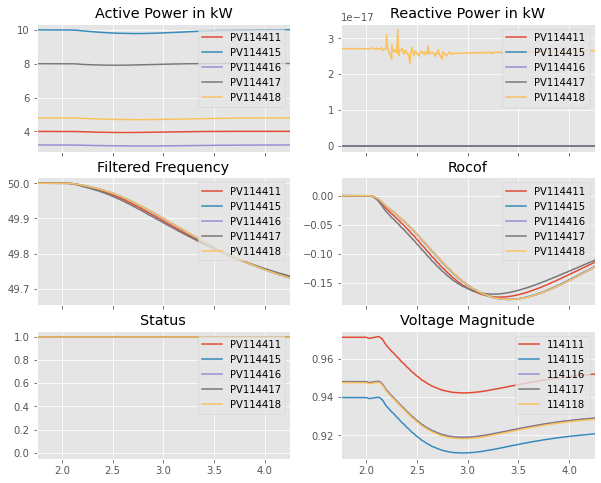

In [21]:
vscs = ['PV114411','PV114415', 'PV114416','PV114417', 'PV114418'] 
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,8), sharex=True)

for vsc in vscs: 
    p = ext.getInj(vsc).Pgen 
    q = ext.getInj(vsc).Qgen 
    w = ext.getInj(vsc).fmfilt
    df = ext.getInj(vsc).rocof
    status = ext.getInj(vsc).status
    #Fvl = ext.getInj(vsc).Fvl

    ax1.plot(p.time, p.value*1000, label=vsc)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=vsc)
    ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kW')
    ax3.plot(w.time, w.value, label=vsc)
    ax3.legend(loc="upper right")
    ax3.set_title('Filtered Frequency')
    ax4.plot(df.time, df.value, label=vsc)
    ax4.legend(loc="upper right")
    ax4.set_title('Rocof')
    ax5.plot(status.time, status.value, label=vsc)
    ax5.legend(loc="upper right")
    ax5.set_title('Status')

 

# Voltages
buses = ['114111','114115' ,'114116', '114117', '114118']

for bus in buses:
    v = ext.getBus(bus).mag
    ax6.plot(v.time, v.value, label=bus)
    ax6.legend(loc="upper right")
    ax6.set_title('Voltage Magnitude')

ax6.set_xlim([1.75, 4.25])
ax5.set_ylim([-0.05, 1.05])    
    
plt.savefig(out_dir+'PV neighbourhood.pdf') 

# Induction machines neighbourhood

<Figure size 720x432 with 0 Axes>

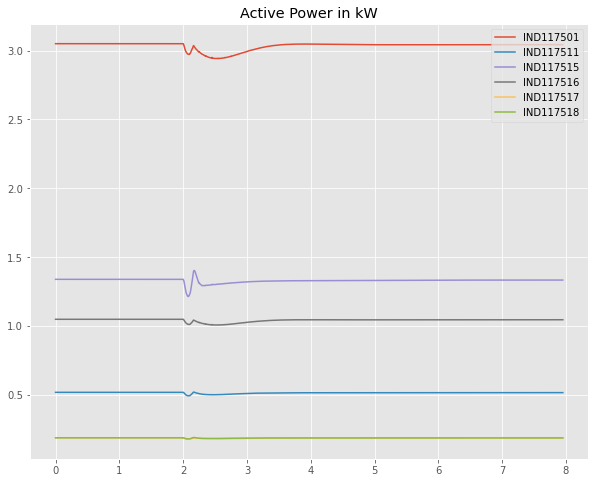

In [22]:
ims = ['IND117501','IND117511', 'IND117515', 'IND117516', 'IND117517', 'IND117518'] 
fig = plt.figure(None, (10,6)) 
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8), sharex=True)

for im in ims: 
    p = ext.getInj(im).P 
#     q = ext.getInj(im).q
    ax1.plot(p.time, p.value*1000, label=im)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
#     ax2.plot(q.time, q.value*1000, label=im)
#     ax2.legend(loc="upper right")
#     ax2.set_title('Reactive Power in kVar')    
plt.savefig(out_dir+'IM neighbourhood.pdf')  

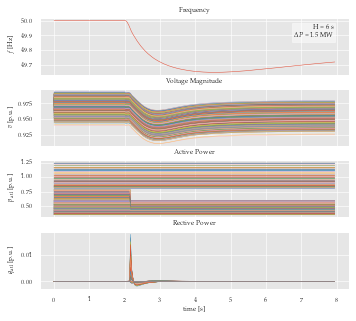

In [23]:
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
# sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
pt = 1/72.27

parameters = '\n'.join(('H = 6 s',
                        '$\Delta P$ = 1.5 MW',
                        ))

fig,axs = plt.subplots(3,1, figsize = (360*pt, 3*90*pt), sharex='col', sharey = 'row')
fig.subplots_adjust(hspace=0.25, wspace = 0.05)
axs = axs.ravel()
w = ext.getSync('G').S

sns.lineplot(ax=axs[0], y=w.value*50, x=w.time,linewidth=0.5, label='f', legend = False)
# axs[0].plot(w.time, w.value*50, label='f')
# axs[0].set_title('Frequency')
axs[0].set_ylabel('$f$ [Hz]')
for bus in buses:
    v = ext.getBus(bus).mag
    axs[1].plot(v.time, v.value, linewidth=0.4)
#     ax1.legend(loc="upper right")
# axs[1].set_title('Voltage Magnitude')
axs[1].set_ylabel('$v$ [p.u.]')
# axs[2].set_title('Active Power')
axs[2].set_ylabel('$p_\mathrm{ATL}$ [p.u.]')
# axs[3].set_title('Rective Power')
# axs[3].set_ylabel('$q_\mathrm{atl}$ [p.u.]')
axs[2].set_xlabel('time [s]')    
for unit in TLs: 
    P = ext.getInj(unit).P
    # Q = ext.getInj(unit).Q
    # wm = ext.getInj(unit).wm
    punit = ext.getInj(unit).Punit
    qunit = ext.getInj(unit).Qunit

    status = ext.getInj(unit).status
    axs[2].plot(punit.time, punit.value, linewidth=0.4)
    # axs[3].plot(qunit.time, qunit.value, linewidth=0.4)
    # axs[3].plot(P.time, P.value*1000, linewidth=0.4)
#     ax2.legend(loc="upper right")
    # axs[3].set_title('Reactive Power in kVar')
    # axs[3].plot(qunit.time, qunit.value, label=unit)


# axs[3].set_ylabel('$P_\mathrm{atl}$ [kW]')

props = dict(boxstyle='square', facecolor='white', alpha=0.5)
axs[0].text(0.95, 0.87,parameters, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
fig.align_ylabels(axs[:])    
fig.savefig(out_dir + control + '_' + strength + '.png',bbox_inches='tight', dpi = 300)
    
# plt.savefig(out_dir+'Vn.pdf')  

In [24]:
x = 1